<a href="https://colab.research.google.com/github/DanRHowarth/Artificial-Intelligence-Cloud-and-Edge-Implementations/blob/master/Oxford_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

# Pandas Tutorial 

* This notebook covers example code for pandas. It includes the following topics:
    * Code related to loading data and accessing parts of the data:
      * Series
      * Dataframes
      * Accessing attributes of Dataframes
      * Accessing and Filtering Values
    * Code related to preprocessing the data:
      * Dealing with missing values
      * Dropping columns 
      * Dealing with categorical data 
    * Code related to Exploratory Data Analysis: 
      * Summary statistics
      * Groupby
    * Code related to feature engineering:
      * Creating new columns 
      * Use apply to create new features 


#### Exercises
 * Each section will have an exercise to help reinforce your learning. We suggest you:
   * Write out each line of code by hand (rather than copy and paste it from the relevant example) - this will improve your understanding of code syntax
   * Write out, above each line of code, an explanation as to what the code, using a comment `#` - this will improve your understanding of how the code works


## 1. CODE RELATED TO LOADING DATA AND ACCESSING DATA

### 1.1 SERIES
* A Series is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its index. It can be thought of as an ordered dict, with labels matched to values in the order they are passed.

In [1]:
# we start with our import statements - these are convention for pandas and numpy libraries
import numpy as np
import pandas as pd

In [2]:
# creating a series by passing a list of values, and a custom index label. 
# Note that the labelled index reference for each row and it can have duplicate values
a = pd.Series([1,2,3,np.nan,5,6], index=['A','B','C','D','E','F'])

print ("Pandas Series from values list and index list:")
print(a)

Pandas Series from values list and index list:
A    1.0
B    2.0
C    3.0
D    NaN
E    5.0
F    6.0
dtype: float64


In [3]:
# The Series constructor can convert a dictonary as well, using the keys of the dictionary as its index
sample_dict = {'A':1,'B':2,'C':3,'D':np.nan,'E':5,'F':6}
sample_dict

b = pd.Series(sample_dict)
print ("Pandas series from a dictionary")
print(b)

Pandas series from a dictionary
A    1.0
B    2.0
C    3.0
D    NaN
E    5.0
F    6.0
dtype: float64


In [6]:
# we can create a series by passing in other functions
series1 = pd.Series(np.arange(-10,10,2))

# here the series is created with assigned index in numerical order
series1

0   -10
1    -8
2    -6
3    -4
4    -2
5     0
6     2
7     4
8     6
9     8
dtype: int64

In [7]:
# we can pass in a list like this, and define the datatype 
series_list = pd.Series(list('1234'))#,dtype=int)
series_list

0    1
1    2
2    3
3    4
dtype: object

In [8]:
# and change the dtype like this 
series_list = series_list.astype(str)

# we can just call the values of a series (note no the index values are not displayed)
series_list.values

array(['1', '2', '3', '4'], dtype=object)

In [9]:
# we can create a series using timeseries information
time_eg = pd.Series(index=pd.date_range('20180601',periods=8,freq='M'))
time_eg

<ipython-input-9-b0a75e910cdd>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  time_eg = pd.Series(index=pd.date_range('20180601',periods=8,freq='M'))


2018-06-30   NaN
2018-07-31   NaN
2018-08-31   NaN
2018-09-30   NaN
2018-10-31   NaN
2018-11-30   NaN
2018-12-31   NaN
2019-01-31   NaN
Freq: M, dtype: float64

In [10]:
# we can pass in our own index values as the Series is created
series3 = pd.Series(np.arange(0,5),index=['One','Two','Three','Four','Five'])
series3

One      0
Two      1
Three    2
Four     3
Five     4
dtype: int64

In [11]:
# or we can do it later
# create a new series 
series2 = pd.Series(['Five','Four','Three','Two','One'])
series2

0     Five
1     Four
2    Three
3      Two
4      One
dtype: object

In [12]:
# add the index
series2.index=['One','Two','Three','Four','Five']
series2

One       Five
Two       Four
Three    Three
Four       Two
Five       One
dtype: object

In [13]:
# we can name our Series
series1.name = 'series1'
series1

0   -10
1    -8
2    -6
3    -4
4    -2
5     0
6     2
7     4
8     6
9     8
Name: series1, dtype: int64

In [14]:
# we can set the name of the index too
series1.index.name = 'digits'
series1

digits
0   -10
1    -8
2    -6
3    -4
4    -2
5     0
6     2
7     4
8     6
9     8
Name: series1, dtype: int64

In [15]:
# index characteristics (if index is a range)
series1.index

RangeIndex(start=0, stop=10, step=1, name='digits')

In [16]:
# and if its an object 
series2.index

Index(['One', 'Two', 'Three', 'Four', 'Five'], dtype='object')

In [17]:
# and values
series1.values

array([-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8])

In [18]:
# we can add further properties or methods to the properties
series1.index.dtype

dtype('int64')

In [19]:
# values or indexes can be converted to a list, e.g.
list_eg = series2.index.tolist()
list_eg

['One', 'Two', 'Three', 'Four', 'Five']

In [20]:
# check dtype
series1.dtype

dtype('int64')

In [21]:
# we can access value of series like this (see Dataframes section below for more detail)
# brings up the value at index position 
series2[1]

'Four'

In [24]:
# as does this
series2.iloc[3]

'Two'

In [25]:
# brings up the value at index name 
series2['Four']

'Two'

In [26]:
# as does this
series2.loc['One']

'Five'

In [27]:
# and we can replace values inplace
series2['Four']= 2
series2

One       Five
Two       Four
Three    Three
Four         2
Five       One
dtype: object

#### EXERCISE 1.1: CREATING A SERIES
* Create a Series using one of the methods above 
* Edit some of its attributes, again using some of the methods above



In [38]:
## EXERCISE CODE HERE
# Create a fruits series
ex_fruits = pd.Series(['Apple','Orange','Mango'], index=['A','O','M'])
#Giving name to the series
ex_fruits.name = 'Fruits'
#Giving name to the series index
ex_fruits.index.name = 'Start_Letter'
display(ex_fruits)

Start_Letter
A     Apple
O    Orange
M     Mango
Name: Fruits, dtype: object

### 1.2 DATAFRAMES
* A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). 
* The DataFrame has both a row and column index; it can be thought of as a dict of Series all sharing the same index.

In [44]:
## create our own dataframe
data = {'Gender': ['F', 'M', 'M'],
        'Emp_ID': ['E01', 'E02', 'E03'],
        'Age': [25, 27, 29]}

display(data)
# We want the order the columns, so lets specify in columns parameter
df = pd.DataFrame(data, columns=['Emp_ID','Gender', 'Age'])
display(df)

{'Gender': ['F', 'M', 'M'],
 'Emp_ID': ['E01', 'E02', 'E03'],
 'Age': [25, 27, 29]}

,Emp_ID,Gender,Age
0,E01,F,25
1,E02,M,27
2,E03,M,29


In [45]:
# select a column of the dataframe
df['Age']

0    25
1    27
2    29
Name: Age, dtype: int64

In [46]:
# this is actually a series and we can apply the functionality learned above to it
type(df['Age'])

pandas.core.series.Series

In [47]:
# note that this is a view and not a copy of the data 
age = df['Age']

# replace a value in the series 
age[0] = 23
age

<ipython-input-47-e90042f84854>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age[0] = 23


0    23
1    27
2    29
Name: Age, dtype: int64

In [48]:
# and it changes the original value
df

,Emp_ID,Gender,Age
0,E01,F,23
1,E02,M,27
2,E03,M,29


In [124]:
# a common way to load dataframes is by the read_[file format] methods
# this loads a csv file of a kaggle competition dataset
kaggle = pd.read_csv('https://raw.githubusercontent.com/DanRHowarth/DSfIOT_MeetUps/master/train.csv')

In [50]:
# we can check the dataframe has loaded and look at a subsection of it
kaggle.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:
# another method is to load a dataframe and point the parameters of the load
# method to data and column values. 

# here we are loading in data from the scikit learn library
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# load dataframe
df_eg = pd.DataFrame(data.data, columns = data.feature_names)

#### EXERCISE 1.2
* Return the head of the `df_eg `dataframe
* Look at its bottom rows using .tail() 

In [56]:
# EXERCISE CODE GOES HERE
# extracting the top rows in the dataframe
print('Top Rows')
display(df_eg.head())
# extracting the bottom rows in the dataframe
print('Bottom Rows')
display(df_eg.tail())

Top Rows


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Bottom Rows


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


### 1.3 ACCESSING ATTRIBUTES OF DATAFRAMES
* We can access a lot of information once our data has been loaded as a dataframe
* Most of the common attributes are covered below


---

**A NOTE ON INDEXES**
* pandas’s Index objects are responsible for holding the axis labels and other metadata
* pandas will assign an index if not explicitly called
* there is a lot of functionality for indexes (not covered here) that can be explored in the documentation

In [64]:
# like numpy, pandas has a shape method 
print(kaggle.shape)
print ('The number of features in the data set is: ',kaggle.shape[1])
print ('The number of datapoints in the data set is: ',kaggle.shape[0])

(1460, 81)
The number of features in the data set is:  81
The number of datapoints in the data set is:  1460


In [65]:
# we can get the datatypes of the columns, which can be helpful to know for preprocessing purposes 
# here we select a subset of the 81 columns 
kaggle.dtypes[0:10]

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
Alley           object
LotShape        object
LandContour     object
Utilities       object
dtype: object

In [66]:
# we can get a view of the column names
print("Column Names:" , df_eg.columns)

Column Names: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [67]:
# GET INDEX DETAIL
# here our index is just the row numbers so it returns what our value range is 
print("DataFrame Index: ", kaggle.index)

DataFrame Index:  RangeIndex(start=0, stop=1460, step=1)


In [68]:
# we can access a specific column's values (and also see below for more on this)
kaggle['MSZoning'].values

array(['RL', 'RL', 'RL', ..., 'RL', 'RL', 'RL'], dtype=object)

In [69]:
# returns the unique values
kaggle['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [70]:
# sort our dataframe by certain col values
kaggle.sort_values(by=['SaleCondition','YrSold'])[0:10] # this doesn't reorder the columns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
40,41,20,RL,84.0,8658,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,12,2006,WD,Abnorml,160000
91,92,20,RL,85.0,8500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,12,2006,WD,Abnorml,98600
129,130,20,RL,69.0,8973,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnWw,NaN,0,7,2006,WD,Abnorml,150000
144,145,90,RM,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,ConLI,Abnorml,125000
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
303,304,20,RL,70.0,9800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2006,WD,Abnorml,149900
351,352,120,RL,NaN,5271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,190000
358,359,80,RL,92.0,6930,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,130000
393,394,30,RL,NaN,7446,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,4,2006,WD,Abnorml,100000


###  1.4 ACCESSING AND FILTERING VALUES 

In [74]:
# selection/view by column name
df_eg['mean smoothness'][0:10]

0    0.11840
1    0.08474
2    0.10960
3    0.14250
4    0.10030
5    0.12780
6    0.09463
7    0.11890
8    0.12730
9    0.11860
Name: mean smoothness, dtype: float64

In [75]:
# selection by row numbers
kaggle[0:3]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


#### .loc and .iloc
* You can use either the `.loc` (index labels) or `.iloc` (index integer) to select certain rows. We explore their uses below.
* If in doubt, use `.iloc` as it is less ambiguous

In [76]:
# selection by label index
kaggle.loc[0:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [78]:
# Selection by position
kaggle.iloc[0:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


* Here, both methods work similarily. If our index had a numerical value that we had passed in tahhat did not match its index position (for example '2' was the fifth index value), then our code might encounter some problems. In this case, it is better to use `.iloc` and refer to the index position.
* Below has some further examples of usage

In [79]:
# selection by index of specific lable names - we can't use iloc here
print(kaggle.loc[0:3,['YrSold','ScreenPorch']])

   YrSold  ScreenPorch
0    2008            0
1    2007            0
2    2008            0
3    2006            0


In [80]:
# Selection by row and column between given rows as range
kaggle.iloc[0:2,0:2]

,Id,MSSubClass
0,1,60
1,2,20


In [81]:
# selection by row and column position between given specific row numbers
kaggle.iloc[[1,2,4],[0,2]]

,Id,MSZoning
1,2,RL
2,3,RL
4,5,RL


In [82]:
# Select element at index 1, 1
print(kaggle.iloc[1,1])

20


In [83]:
#  select column by position
print(kaggle.iloc[:, 2])

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object


In [84]:
# Filter dataframe based on a value condition on one column
kaggle[kaggle['LotArea'] > 30000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
171,172,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
271,272,20,RL,73.0,39104,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,241500
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
384,385,60,RL,NaN,53107,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,240000
411,412,190,RL,100.0,34650,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,1,2006,WD,Normal,145000
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
457,458,20,RL,NaN,53227,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,256000


In [85]:
# filter based on multiple conditions on multiple columns using AND operator
kaggle[(kaggle['LotArea']>20000) & (kaggle['YrSold']>2008)] # AND operator

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
171,172,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
588,589,20,RL,65.0,25095,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Partial,143000
661,662,60,RL,52.0,46589,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,402000
726,727,20,RL,NaN,21695,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,222000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
807,808,70,RL,144.0,21384,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,223500
828,829,60,RL,NaN,28698,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Abnorml,185000
939,940,70,RL,NaN,24090,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,COD,Normal,244400
1048,1049,20,RL,100.0,21750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,11,2009,WD,Normal,115000


#### EXERCISE 1.4: ACCESSING AND FILTERING VALUES
* Using one of the dataframes we have loaded in, practice filtering the data by:
  * .loc
  * .iloc
  * value condition 

In [117]:
## EXERCISE CODE HERE
# extracting rows with index 10
display(kaggle.iloc[0:3,0:5])
# extracting top 2 rows for columns starting from Id to MSZoning
display(kaggle.loc[0:2,'Id':'MSZoning'])
# extracting rows whose LotFrontage is NaN value
display(kaggle[kaggle.LotFrontage.isna()])


,Id,MSSubClass,MSZoning,LotFrontage,LotArea
0,1,60,RL,65.0,8450
1,2,20,RL,80.0,9600
2,3,60,RL,68.0,11250


,Id,MSSubClass,MSZoning
0,1,60,RL
1,2,20,RL
2,3,60,RL


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000


## 2. CODE RELATED TO PREPROCESSING THE DATA
* Dealing with missing values
* Dropping columns 
* Dealing with categorical data 
* Changing the datatype of columns

### 2.1 DEALING WITH MISSING VALUES

In [118]:
# understand what values are missing - here we sum the null values for each column 
# isnull returns a boolean, which we sum
kaggle.isnull().sum() 

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [119]:
# percentage of entries per column type 
print('Percentage of Null Values per column/feature:')
np.around((kaggle.isnull().sum() / len(kaggle)*100), decimals=1)

Percentage of Null Values per column/feature:


Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage      17.7
LotArea           0.0
                 ... 
MoSold            0.0
YrSold            0.0
SaleType          0.0
SaleCondition     0.0
SalePrice         0.0
Length: 81, dtype: float64

In [122]:
# we can drop all the rows that NaNs appear on
len(kaggle['Fence'].dropna())

281

#### EXERCISE 2.1: DEALING WITH MISSING DATA
* There are a range of ways to deal with missing values, including `.fillna()`, fills a NaN witha specified value.
* This specified value an be a data value or a method that fills in the data from surrounding data.
* Look at the `.fillna()` documentation and select a method to use
* Select a column from above, and apply the method to that column


In [131]:
## EXERCISE CODE HERE
#reading the data
kaggle = pd.read_csv('https://raw.githubusercontent.com/DanRHowarth/DSfIOT_MeetUps/master/train.csv')
#Displaying before nan fill with forward fill method
display('Before')
display(kaggle['Fence'])
# performing nan fill with forward fill method
kaggle.Fence.fillna(method='ffill', inplace=True)
#Displaying after nan fill with ffill method
display('After')
display(kaggle['Fence'])

'Before'

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1455      NaN
1456    MnPrv
1457    GdPrv
1458      NaN
1459      NaN
Name: Fence, Length: 1460, dtype: object

'After'

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1455     GdWo
1456    MnPrv
1457    GdPrv
1458    GdPrv
1459    GdPrv
Name: Fence, Length: 1460, dtype: object

### 2.2 DROPPING COLUMNS

In [132]:
# you will want to drop your target column from a data set to train a machine learning algorithm
# here we firs drop the column
X = kaggle.drop(['SalePrice'],axis=1)

In [133]:
# and set it as our target variable
# we use X and y as typical names when passing in data to be trained
y = kaggle['SalePrice']

In [134]:
print(X.shape)
print(y.shape)

(1460, 80)
(1460,)


### 2.3 DEALING WITH CATEGORICAL DATA
* `pandas` has functionality to convert values within a dataframe to 0s and 1s
* This is required to convert categorical today to something that can be fed into a machine learning algorithm 
* `sci-kit learn` has other ways of doing this, which will be covered in the sci-kit learn notebook

In [135]:
# let identify a column that has categorical data
qualitative = [f for f in kaggle.columns if kaggle.dtypes[f] == 'object']
qualitative

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [136]:
# selecting one of the columns, we can see it has four values
kaggle['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

### 2.4 CHANGING THE DATATYPE OF COLUMNS

In [137]:
# here, we use get_dummies to conver these to either a 0 or 1
dummies = pd.get_dummies(kaggle['Fence'], prefix='dummy')
dummies[0:20]

,dummy_GdPrv,dummy_GdWo,dummy_MnPrv,dummy_MnWw
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,0,0,1,0
9,0,0,1,0


In [138]:
# and we can join the data back to the original dataframe, or a subset of it
df_with_dummy = kaggle[['Fence']].join(dummies)
df_with_dummy[0:20]

,Fence,dummy_GdPrv,dummy_GdWo,dummy_MnPrv,dummy_MnWw
0,NaN,0,0,0,0
1,NaN,0,0,0,0
2,NaN,0,0,0,0
3,NaN,0,0,0,0
4,NaN,0,0,0,0
5,MnPrv,0,0,1,0
6,MnPrv,0,0,1,0
7,MnPrv,0,0,1,0
8,MnPrv,0,0,1,0
9,MnPrv,0,0,1,0


## 3. CODE RELATED TO EXPLORATORY DATA ANALYSIS
* Summary Statistics  
* Groupby

### 3.1 SUMMARY STATISTICS


In [139]:
# describe gives us a range of summary statistics for each of the numerical columns
df_eg.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [140]:
# covariance: It returns the co-variance between suitable columns
df_eg.cov()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,12.418920,4.907582,85.447142,1224.483409,0.008454,0.094197,0.190128,0.112475,0.014273,-7.753706e-03,...,16.513749,6.433100,114.288570,1888.227223,0.009625,0.229249,0.387386,0.172393,0.035746,0.000450
mean texture,4.907582,18.498909,34.439759,485.993787,-0.001415,0.053767,0.103692,0.048977,0.008419,-2.321158e-03,...,7.329267,24.110148,51.745933,841.283832,0.007611,0.188010,0.270110,0.083491,0.027942,0.009260
mean perimeter,85.447142,34.439759,590.440480,8435.772345,0.070836,0.714714,1.387234,0.802360,0.121922,-4.485888e-02,...,113.858063,45.258113,792.328208,13026.148359,0.083526,1.742478,2.858506,1.231848,0.284300,0.022391
mean area,1224.483409,485.993787,8435.772345,123843.554318,0.876178,9.264931,19.244924,11.241958,1.459596,-7.034264e-01,...,1637.521341,621.824934,11341.789807,192192.557633,0.992514,21.616602,37.634415,16.701789,3.125809,0.023756
mean smoothness,0.008454,-0.001415,0.070836,0.876178,0.000198,0.000490,0.000585,0.000302,0.000215,5.806859e-05,...,0.014487,0.003118,0.112879,1.655299,0.000259,0.001045,0.001276,0.000465,0.000343,0.000127
mean compactness,0.094197,0.053767,0.714714,9.264931,0.000490,0.002789,0.003718,0.001703,0.000873,2.108131e-04,...,0.136643,0.080544,1.047413,15.323436,0.000682,0.007194,0.008994,0.002831,0.001667,0.000656
mean concavity,0.190128,0.103692,1.387234,19.244924,0.000585,0.003718,0.006355,0.002850,0.001094,1.895588e-04,...,0.265181,0.146934,1.954350,30.682405,0.000817,0.009469,0.014704,0.004513,0.002020,0.000741
mean concave points,0.112475,0.048977,0.802360,11.241958,0.000302,0.001703,0.002850,0.001506,0.000492,4.572905e-05,...,0.155721,0.069819,1.116016,17.886881,0.000401,0.004075,0.006091,0.002321,0.000902,0.000258
mean symmetry,0.014273,0.008419,0.121922,1.459596,0.000215,0.000873,0.001094,0.000492,0.000752,9.289106e-05,...,0.024609,0.015274,0.201896,2.765725,0.000267,0.002041,0.002481,0.000775,0.001187,0.000217
mean fractal dimension,-0.007754,-0.002321,-0.044859,-0.703426,0.000058,0.000211,0.000190,0.000046,0.000093,4.984872e-05,...,-0.008657,-0.002225,-0.048671,-0.932024,0.000081,0.000510,0.000510,0.000081,0.000146,0.000098


In [141]:
# correlation: It returns the correlation between suitable columns.
df_eg.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


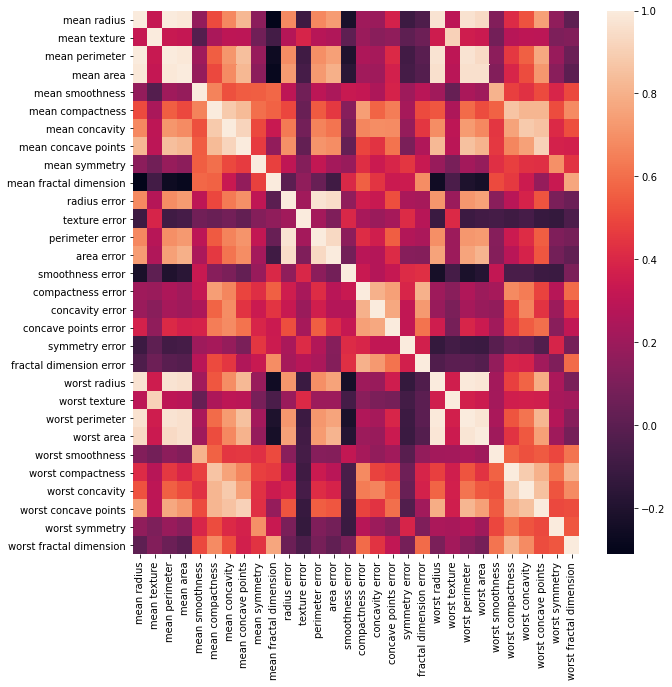

In [142]:
# we can convert this to a heatmap (more on this in the Data Visualisation notebook)
# use the seaborn visualisation library 
import matplotlib.pyplot as plt
import seaborn as sns

#get the correlation
corr = df_eg.corr()

# return the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### 3.2 GROUPBY 

  * `pandas` provides a flexible `groupby` interface, enabling you to slice, dice, and summarize datasets in a natural way. This is often an important part of data analysis and is explained in some detail below.



  
  * `split-apply-combine` is used for describing group operations. It breaks down as:
    * Split a pandas object into pieces using one or more keys (in the form of functions, arrays, or DataFrame column names)
    * Calculate group summary statistics, like count, mean, or standard deviation, or a user-defined function
    * Apply within-group transformations or other manipulations, like normalization, linear regression, rank, or subset selection
  
* In the first stage of the process, data contained in a pandas object, whether a Series, DataFrame, or otherwise, is split into groups based on one or more keys that you provide. The splitting is performed on a particular axis of an object. For example, a DataFrame can be grouped on its rows (axis=0) or its columns (axis=1). 
* Once this is done, a function is applied to each group, producing a new value. Finally, the results of all those function applications are combined into a result object. *Go back and look at this again to ensure you understand it, after the examples. We will reinforce this process in the examples below.*


  * We can perform quite complex group operations by utilizing any function that accepts a `pandas` object or `NumPy` array.

**(Data) - Split**
* We first need a key to split the data on. This determines how we will shape the data. (We also need the data, it might not be the dataframe, but a subset of it or a series). A key can be any of the following:
    * A list or array of values that is the same length as the axis being grouped 
    * A value indicating a column name in a DataFrame
    * A dict or Series giving a correspondence between the values on the axis being grouped and the group names
    * A function to be invoked on the axis index or the individual labels in the index 

*Example 3.2.1: (Data) - Split - Apply - Combine Step by Step*

In [151]:
# let's get our data and split it by a key step by step
group = kaggle[['SalePrice']]

# we can see this just returns a pandas series
print(type(group))


<class 'pandas.core.frame.DataFrame'>


In [152]:
# now we apply the split, using our key - this will order the data 
grouped = group.groupby(kaggle['OverallQual'])

# running this now returns the groupby object - we don't actually get a result until we apply a function and combine it 
grouped

  **'Gotchas'**
  * Pay close attention to the syntax we use in `Groupby` as it can seem fiddly at first and lead to frustration. 
    * We use a pair of braces `[]` to contain our arguments, for both selecting the data and the key. 
    * Note that in setting the `Groupby` function by specifying our key, we specify the dataframe where the key comes from, even if this is the same dataframe the data is drawn from. 
     * This is because we can actually use values not associated with the original data as a key to group our data by. Therefore the Groupby object makes no assumption about where the key comes from and we have to explicitly tell it. 



---


  **Exercise**

  * Go back to the cell where we get our data and split the cell. Add an additional pair of braces to the first line of code like this...:
    * `group = kaggle[['SalePrice']]`
  * ...and run the cell again, noting what type of pandas object is returned.






**Combine**
* Now we combine the data with some sort of aggregating function, which will be applied and returned to complete the groupby operation

In [153]:
# Lets apply
grouped.mean()

,SalePrice
OverallQual,
1,50150.000000
2,51770.333333
3,87473.750000
4,108420.655172
5,133523.347607
6,161603.034759
7,207716.423197
8,274735.535714
9,367513.023256


In [154]:
# lets check we know what pandas type group is
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

**Lesson 2:** 
* Chaining the code so that we can return `Groupby` in one line of code
* Returning dataframe objects from Groupby operations

*Example 3.2.2: (Data) - Split - Apply - Combine in one step*

In [162]:
# we can return the same groupby object as above in one line of code
group_ex2 = kaggle['SalePrice'].groupby(kaggle['OverallQual']).mean()
group_ex2

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

*Example 3.2.3: Returning a Dataframe object*

In [163]:
# instead of returning a series object, we can return a Dataframe object
group_ex3 = kaggle[['SalePrice','LotArea']].groupby(kaggle['OverallQual']).mean()
type(group_ex3)

pandas.core.frame.DataFrame

In [164]:
# which can be returned like this 
group_ex3

,SalePrice,LotArea
OverallQual,,
1,50150.000000,7510.000000
2,51770.333333,7840.000000
3,87473.750000,8358.550000
4,108420.655172,8917.982759
5,133523.347607,10153.352645
6,161603.034759,10026.649733
7,207716.423197,11075.799373
8,274735.535714,11103.839286
9,367513.023256,13424.186047


#### EXERCISE 3.2
* There are a number of different methods to apply and combine the data (we only covered `.mean()` above). These include:
 * `count()`	
 * `mean(), median()`
 * `min(), max()`	
 * ` std(), var()`	
 *  `prod()`	
 * `sum()`	
* Using one of the dataframes we have loaded, practice using groupby() operations, using some these aggregation methods  

In [167]:
## EXERCISE CODE HERE
kaggle[['SalePrice','LotArea']].groupby(kaggle['OverallQual']).std()


,SalePrice,LotArea
OverallQual,,
1,15344.217152,3549.676042
2,14254.200796,1519.473593
3,24688.567399,3303.494999
4,29022.003886,5935.595940
5,27107.330927,9200.579661
6,36090.182933,9240.751397
7,44466.259414,14078.701223
8,63898.902253,5498.401830
9,81278.174849,6489.045183


## 4. CODE RELATED TO FEATURE ENGINEEERING
* Creating new columns
* Use `apply()` to create new features

### 4.1 CREATING NEW COLUMNS

In [168]:
# we can create a new column by naming it and providing a value
# here we are creating a column that just has values from 0 to the length of the index
kaggle['new_column'] = (pd.DataFrame(np.arange(len(kaggle))))

# we can view the new column, in this instance alongside the SalePrice column 
kaggle[['SalePrice','new_column']][0:20]

,SalePrice,new_column
0,208500,0
1,181500,1
2,223500,2
3,140000,3
4,250000,4
5,143000,5
6,307000,6
7,200000,7
8,129900,8
9,118000,9


In [169]:
# we can obviously do more interesting things. Here we want to see whether the LotArea is over or under the average
# lets take the total of all the lot areas
lot_sum = kaggle['LotArea'].sum()

# and get the average
lot_average = lot_sum/len(kaggle)

# we can then create a new column by dividing each LotArea entry by the average and multiplying by 100 to get the percentage
kaggle['Lot_Area_Comparison'] = np.around((kaggle['LotArea']/lot_average*100), decimals=2)
kaggle[['LotArea','Lot_Area_Comparison']]

,LotArea,Lot_Area_Comparison
0,8450,80.35
1,9600,91.28
2,11250,106.97
3,9550,90.81
4,14260,135.59
...,...,...
1455,7917,75.28
1456,13175,125.28
1457,9042,85.98
1458,9717,92.39


### 4.2 USE APPLY() TO CREATE NEW FEATURES

In [172]:
# apply() can be used to apply a function to a column (axis = 0) or along a row (axis = 1)
kaggle[['LotArea']].apply(np.cumsum, axis = 0)[0:20]

,LotArea
0,8450
1,18050
2,29300
3,38850
4,53110
5,67225
6,77309
7,87691
8,93811
9,101231


In [173]:
# we can use a predefined pandas or numpy method, or write our here
# here we use a lambda, but we could write our own function and pass it in 
# and if we remove the second [] and the axis argument, we can use apply to return a Series
type(kaggle['LotArea'].apply(lambda x: x/2))

pandas.core.series.Series

In [174]:
# note that apply creates copy, and we need to assign the results to a variable or a new column to preserve them
kaggle['SalePrice£'] = kaggle[['SalePrice']].apply(lambda x: x*0.79, axis = 0)
kaggle['SalePrice£'][0:20]

0     164715.0
1     143385.0
2     176565.0
3     110600.0
4     197500.0
5     112970.0
6     242530.0
7     158000.0
8     102621.0
9      93220.0
10    102305.0
11    272550.0
12    113760.0
13    220805.0
14    124030.0
15    104280.0
16    117710.0
17     71100.0
18    125610.0
19    109810.0
Name: SalePrice£, dtype: float64

#### EXERCISE 4.2: USE APPLY() TO CREATE NEW FEATURES
* Code a simple function that takes in a value and performs a simple operation on the value
* Use the `apply()` function to apply that function to a dataframe column

In [179]:
## EXERCISE CODE HERE
kaggle['SalePrice£ Discount 10%'] = kaggle[['SalePrice']].apply(lambda z: z * .9)
kaggle[['SalePrice', 'SalePrice£ Discount 10%'] ]

,SalePrice,SalePrice£ Discount 10%
0,208500,187650.0
1,181500,163350.0
2,223500,201150.0
3,140000,126000.0
4,250000,225000.0
...,...,...
1455,175000,157500.0
1456,210000,189000.0
1457,266500,239850.0
1458,142125,127912.5


## 5. REVIEW
* We have covered:


* There are a number of additional topics that you may wish to follow-up on:
  * Removing duplicate values
  * Joining and merging dataframes
  * More adavnced groupby() and data aggregation techniques 
  * The use of applymap() to apply functions to the whole dataframe
* There are plenty of excellent resources available. We would recommend:
  * [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) (free)
  * [Python for Data Analysis](https://www.amazon.co.uk/Python-Data-Analysis-Wrangling-IPython-ebook/dp/B075X4LT6K/ref=sr_1_1?s=digital-text&ie=UTF8&qid=1540755909&sr=1-1&keywords=python+for+data+analysis )
  * [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/), which links to tutorials